In [ ]:
# Sales Performance Analysis
**Intern:** Samir Mahamad Atnur  
**Intern ID:** 2614  
**Company:** Vaidsys Technologies  
**Internship Duration:** 8 Aug 2025 – 7 Sep 2025


In [ ]:
## 1. Introduction
Main Samir (BCA fresher) ne ye Sales Performance Analysis project complete kiya hai. Iska aim hai retail sales data ko analyse karke
best-selling products, peak sales periods, aur improvement ke liye actionable recommendations dhoondhna.


In [ ]:
## 2. Objectives
- Historical sales data se trends aur patterns identify karna.
- KPIs nikalna: top products, peak months, top regions / segments.
- Practical recommendations dena jisse sales aur profitability improve ho.


In [ ]:
## 3. Dataset & Methodology
**Dataset:** Superstore.csv (provided)  
**Tools:** Python (pandas, matplotlib, seaborn)  
**Method:** Data loading → cleaning → EDA → visualizations → statistical insights → recommendations.

Notes:
- File encoding fix: `encoding='latin1'` (Windows CSV compatibility).
- Date parsing with `dayfirst=True` because dates format `DD/MM/YYYY`.


In [ ]:
## 4. Data Cleaning & Preprocessing
Yahan main ne following steps kiye:
- Encoding fix (latin1) se file load ki.
- Date columns (`Order_Date`, `Ship_Date`) ko datetime me convert kiya (`dayfirst=True`).
- Missing values aur duplicates check kiye aur necessary handling ki (below code me).
- Columns ke naam verify kiye (e.g., `Sub_Category` with underscore).


In [1]:
# Data cleaning checks (run in code cell)
import pandas as pd

# agar df exist nahi karta to load karo (adjust path if needed)
try:
    df
except NameError:
    df = pd.read_csv("Superstore.csv", encoding="latin1")

# convert dates safely
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')
if 'Ship_Date' in df.columns:
    df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True, errors='coerce')

# basic checks
print("Shape:", df.shape)
print("\nNull counts:\n", df.isnull().sum())
print("\nDuplicates count:", df.duplicated().sum())

# Optional: remove exact duplicate rows (uncomment to apply)
# df = df.drop_duplicates().reset_index(drop=True)


Shape: (9800, 18)

Null counts:
 Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

Duplicates count: 0


In [ ]:
## 5. Exploratory Data Analysis (EDA)

Main ne yeh cheezein check ki:
- Category & Sub-Category distribution
- Top products (by Sales)
- Region & State level sales
- Time based trends (Yearly / Monthly)


In [2]:
# 1. Category counts (we saw earlier)
cat_counts = df['Category'].value_counts()
print("Category counts:\n", cat_counts)

# 2. Top Sub-Categories (counts)
subcat_counts = df['Sub_Category'].value_counts()
print("\nTop Sub-Categories (counts):\n", subcat_counts.head(12))

# 3. Sales by Category
sales_by_cat = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Category:\n", sales_by_cat)

# 4. Top 10 products by Sales
top_products = df.groupby("Product_Name")["Sales"].sum().nlargest(10)
print("\nTop 10 products by Sales:\n", top_products)

# 5. Region sales
region_sales = df.groupby('Region')['Sales'].sum()
print("\nSales by Region:\n", region_sales)

# 6. Top 10 States by Sales
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 States by Sales:\n", top_states)

# 7. Time series prep
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
yearly_sales = df.groupby('Year')['Sales'].sum()
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Sales'].sum()
print("\nYearly Sales:\n", yearly_sales)


Category counts:
 Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

Top Sub-Categories (counts):
 Sub_Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Name: count, dtype: int64

Sales by Category:
 Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

Top 10 products by Sales:
 Product_Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL30

In [ ]:
## 6. Visualizations
Neeche diya gaya har plot ke baad ek short caption add karo (example captions provided).


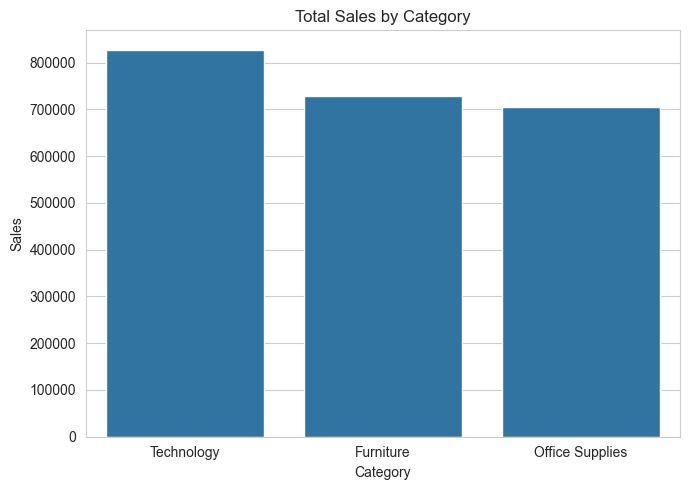

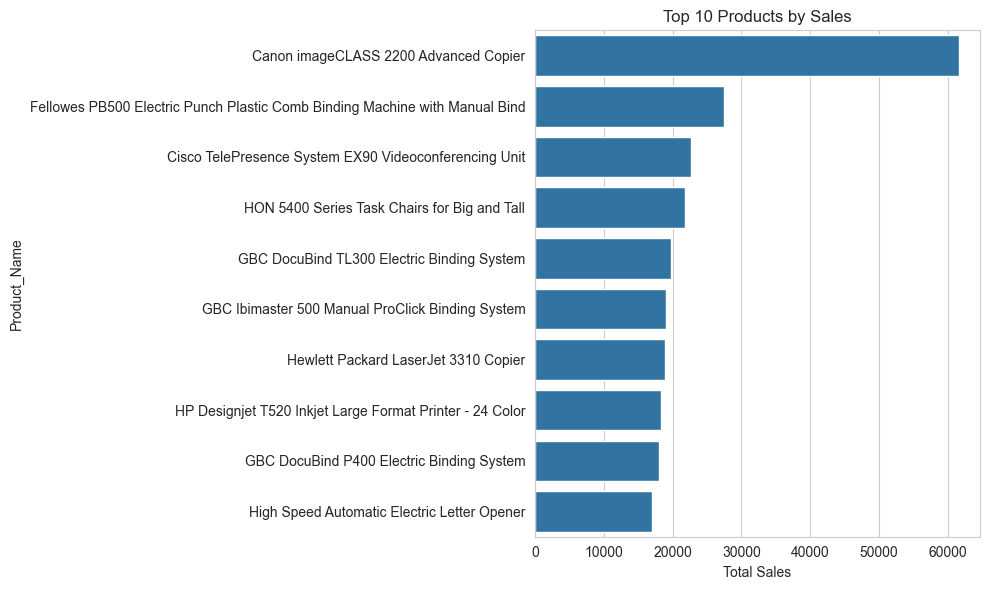

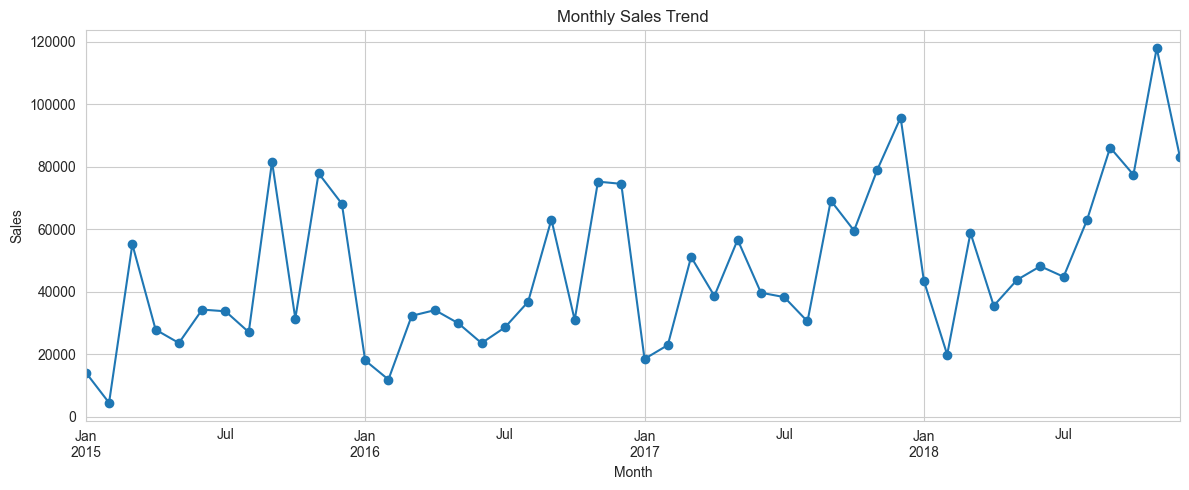

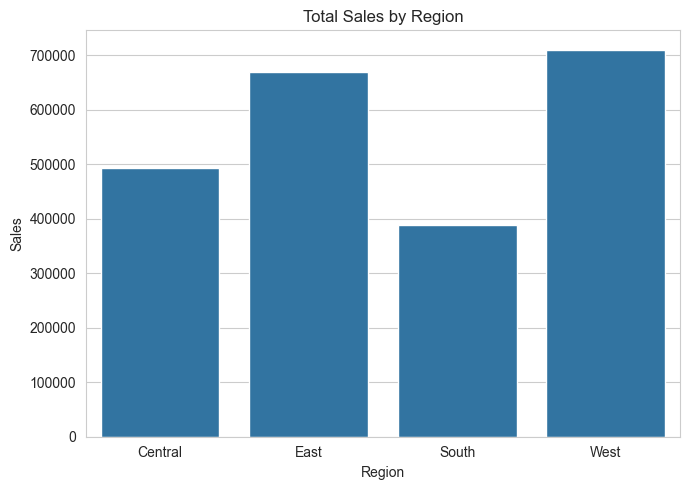

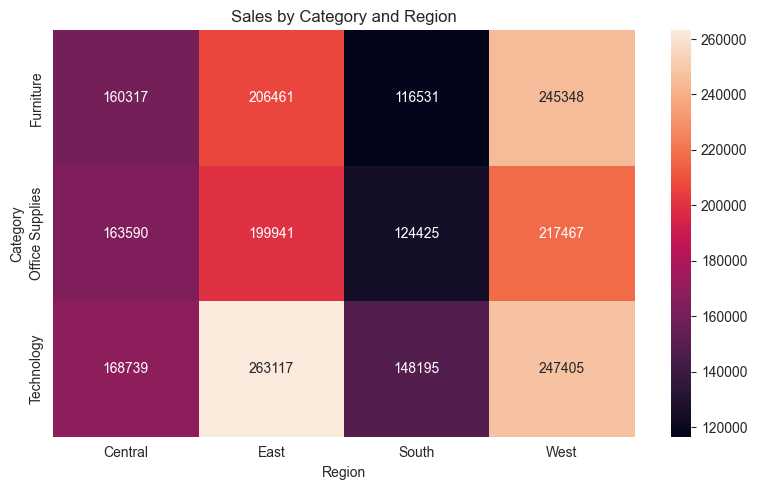

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Category-wise Sales (bar)
plt.figure(figsize=(7,5))
sns.barplot(x=sales_by_cat.index, y=sales_by_cat.values, estimator=sum)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Caption (paste as Markdown)
# **Figure 1:** Total Sales by Category — dikhaata hai kis category ka revenue zyada hai.

# Top 10 products
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()
# **Figure 2:** Top 10 products contribute major share of revenue.

# Monthly sales trend
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()
# **Figure 3:** Monthly Sales Trend — seasonality and peaks.

# Region-wise sales
plt.figure(figsize=(7,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()
# **Figure 4:** Region wise sales distribution.

# Heatmap: Category vs Region
pivot_sales = df.pivot_table(values="Sales", index="Category", columns="Region", aggfunc="sum")
plt.figure(figsize=(8,5))
sns.heatmap(pivot_sales, annot=True, fmt=".0f")
plt.title("Sales by Category and Region")
plt.tight_layout()
plt.show()
# **Figure 5:** Heatmap showing which category performs better in which region.


In [ ]:
## 7. Key Performance Indicators (KPIs)
- **Total Sales:** <fill>
- **Total Orders:** <fill>
- **Unique Customers:** <fill>
- **Average Order Value (AOV):** <fill>
- **Top Category by Sales:** <fill>
- **Top Product by Sales:** <fill>
- **Top Region by Sales:** <fill>


In [4]:
# Auto-generate KPI markdown (run and copy the printed text into a Markdown cell)
total_sales = df['Sales'].sum()
total_orders = len(df)
unique_customers = df['Customer_ID'].nunique() if 'Customer_ID' in df.columns else 'N/A'
aov = total_sales / total_orders if total_orders>0 else 0
top_category = df.groupby('Category')['Sales'].sum().idxmax()
top_product = df.groupby('Product_Name')['Sales'].sum().idxmax()
top_region = df.groupby('Region')['Sales'].sum().idxmax()

kpi_md = f"""
## 7. Key Performance Indicators (KPIs)
- **Total Sales:** {total_sales:,.2f}
- **Total Orders:** {total_orders}
- **Unique Customers:** {unique_customers}
- **Average Order Value (AOV):** {aov:,.2f}
- **Top Category by Sales:** {top_category}
- **Top Product by Sales:** {top_product}
- **Top Region by Sales:** {top_region}
"""

print(kpi_md)



## 7. Key Performance Indicators (KPIs)
- **Total Sales:** 2,261,536.78
- **Total Orders:** 9800
- **Unique Customers:** 793
- **Average Order Value (AOV):** 230.77
- **Top Category by Sales:** Technology
- **Top Product by Sales:** Canon imageCLASS 2200 Advanced Copier
- **Top Region by Sales:** West



In [ ]:
## 9. Conclusion & Recommendations

**Conclusion (short):**  
Is analysis se pata chala ki Office Supplies sabse zyada order volume deta hai, lekin profitability har sub-category me alag hai. Technology products high revenue potential dikhate hai. Sales me seasonality aur region wise differences maujood hain.

**Recommendations (practical):**
1. Focus marketing campaigns on **Top Category** (Technology) and top products (use targeted ads).
2. Re-evaluate discount strategy — agar Discount vs Sales correlation low hai to heavy discounts band karein.
3. Optimize inventory for Office Supplies (high volume) to avoid stockouts.
4. Plan seasonal promotions in peak months (monthly trend analysis se pata chala).
5. Monitor profitability per sub-category; discontinue or renegotiate suppliers for low-margin SKUs.

**Next steps (for intern):**
- Build a small Power BI / Excel dashboard with slicers for Region & Year.
- If time available: try a simple time-series forecast (ARIMA / Prophet) for next 6 months sales.


In [25]:
import pandas as pd


In [27]:
# CSV file load karna with encoding
df = pd.read_csv("superstore.csv", encoding="latin1")

# First 5 rows dekhna
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [28]:
# Dataset ka size (rows, columns)
df.shape


(9800, 18)

In [29]:
# Column names dekhne ke liye
df.columns


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [30]:
# Column ka type aur data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [31]:
# Missing values check karna
df.isnull().sum()


Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [7]:
# Numerical columns ka statistics
df.describe()


,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
# Unique categories
df['Category'].unique()

# Unique regions
df['Region'].unique()


array(['South', 'West', 'Central', 'East'], dtype=object)

In [9]:
# Sales by Category
df.groupby("Category")["Sales"].sum()


Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

In [10]:
# Sales by Region
df.groupby("Region")["Sales"].sum()


Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


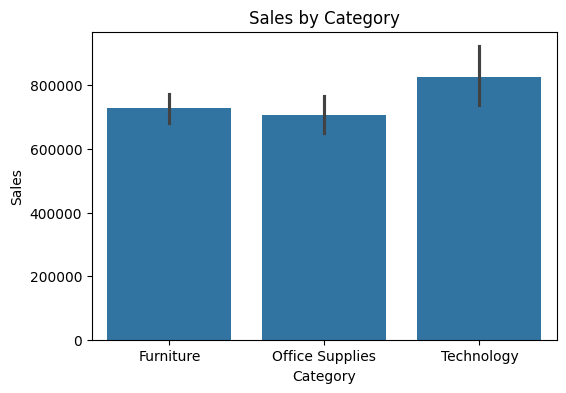

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Sales by Category")
plt.show()


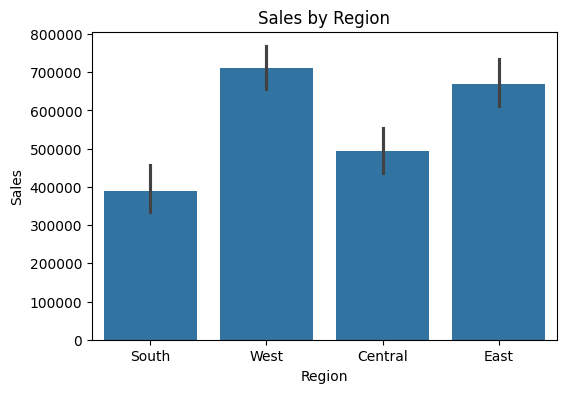

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Sales by Region")
plt.show()


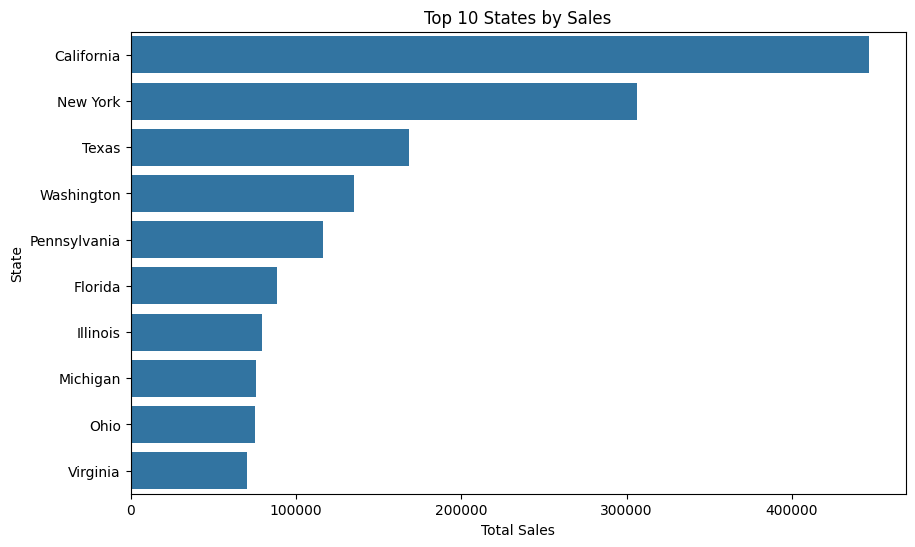

In [14]:
top_states = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Sales")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.show()


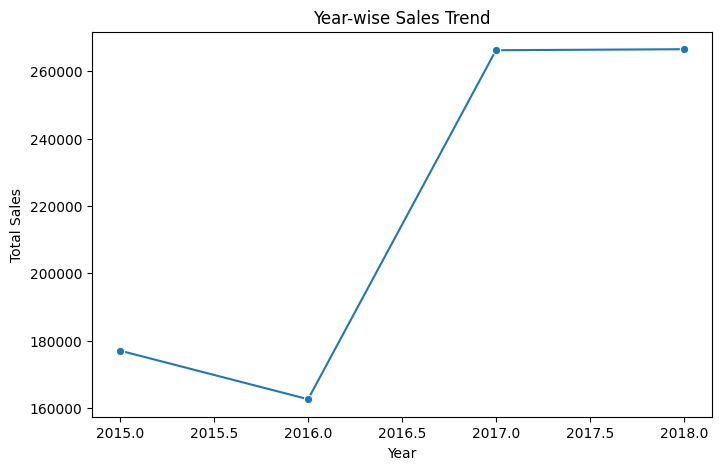

In [15]:
# Date column ko datetime me convert karo
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors='coerce')

# Year column banao
df["Year"] = df["Order_Date"].dt.year

# Line Chart
year_sales = df.groupby("Year")["Sales"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=year_sales.index, y=year_sales.values, marker="o")
plt.title("Year-wise Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show() 



In [16]:
# Dataset ke basic info (rows, columns, datatypes, null values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     3959 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   object        
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub_Category   9800 n

In [17]:
# Missing values check karo
df.isnull().sum()


Row_ID              0
Order_ID            0
Order_Date       5841
Ship_Date           0
Ship_Mode           0
Customer_ID         0
Customer_Name       0
Segment             0
Country             0
City                0
State               0
Postal_Code        11
Region              0
Product_ID          0
Category            0
Sub_Category        0
Product_Name        0
Sales               0
Year             5841
dtype: int64

In [18]:
# Dataset ka size (rows × columns)
df.shape


(9800, 19)

In [19]:
# Numerical columns ka summary
df.describe()


,Row_ID,Order_Date,Postal_Code,Sales,Year
count,9800.000000,3959,9789.000000,9800.000000,3959.000000
mean,4900.500000,2017-03-14 18:19:11.199798016,55273.322403,230.769059,2016.728467
min,1.000000,2015-01-02 00:00:00,1040.000000,0.444000,2015.000000
25%,2450.750000,2016-04-05 00:00:00,23223.000000,17.248000,2016.000000
50%,4900.500000,2017-05-02 00:00:00,58103.000000,54.490000,2017.000000
75%,7350.250000,2018-03-07 00:00:00,90008.000000,210.605000,2018.000000
max,9800.000000,2018-12-11 00:00:00,99301.000000,22638.480000,2018.000000
std,2829.160653,NaN,32041.223413,626.651875,1.119118


In [20]:
# Sirf categorical columns ka summary
df.describe(include='object')


,Order_ID,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [21]:
# Saare column names
df.columns


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Year'],
      dtype='object')

In [22]:
# Category wise count (example)
df['Category'].value_counts()


Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [23]:
# Sub-Category wise count
df['Sub-Category'].value_counts()


KeyError: 'Sub-Category'

In [37]:
df.columns


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [38]:
df['Sub Category'].value_counts()


KeyError: 'Sub Category'

In [40]:
import pandas as pd

# CSV load karo
df = pd.read_csv("Superstore.csv")   # yaha file ka exact naam/path likhna


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2786: invalid start byte

In [41]:
df.columns


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [42]:
import pandas as pd

# CSV ko correct encoding ke sath load karo
df = pd.read_csv("Superstore.csv", encoding="latin1")

# Columns check karo
print(df.columns)


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [43]:
# Category wise count
print(df['Category'].value_counts())

# Sub-Category wise count
print(df['Sub_Category'].value_counts())


Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64
Sub_Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


In [44]:
# Dataset ke basic info
print(df.shape)       # rows, columns count
print(df.info())      # column types
print(df.describe())  # summary stats


(9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dt

In [45]:
# Missing values check
print(df.isnull().sum())


Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64


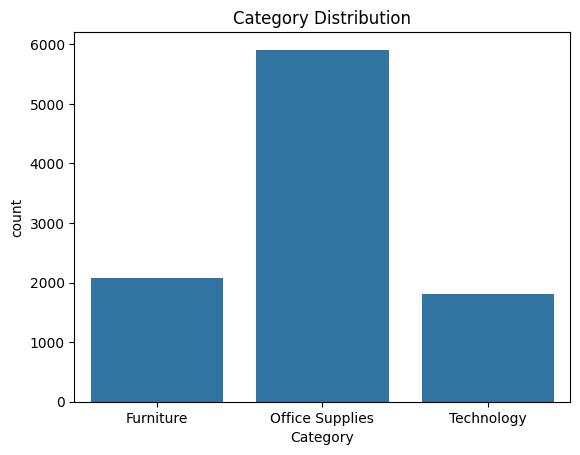

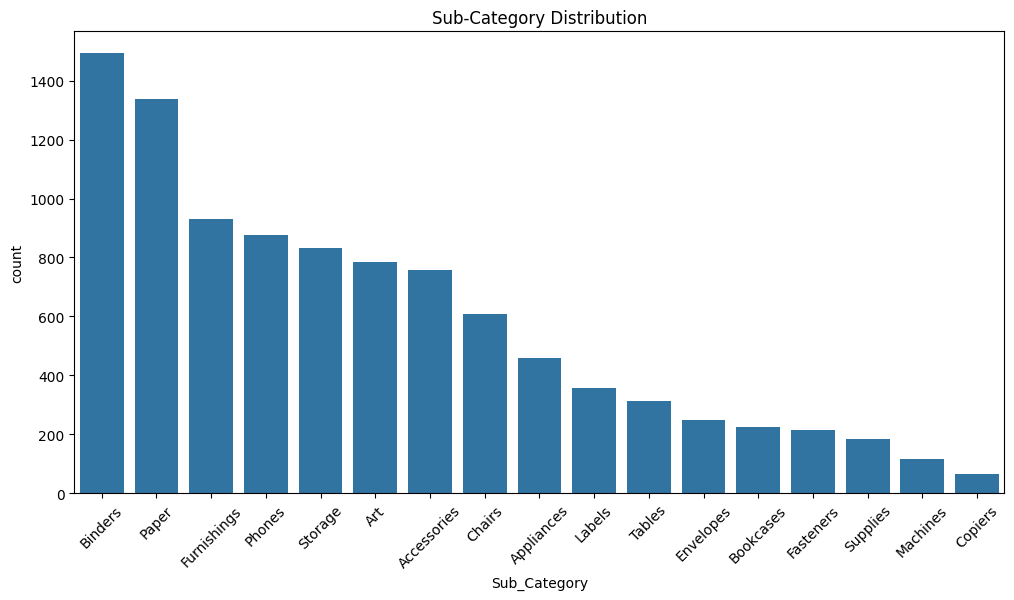

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category wise bar chart
sns.countplot(x="Category", data=df)
plt.title("Category Distribution")
plt.show()

# Sub-Category wise bar chart
plt.figure(figsize=(12,6))
sns.countplot(x="Sub_Category", data=df, order=df['Sub_Category'].value_counts().index)
plt.title("Sub-Category Distribution")
plt.xticks(rotation=45)
plt.show()


In [47]:
# Total Sales
print("Total Sales:", df['Sales'].sum())

# Average Sales
print("Average Sales:", df['Sales'].mean())

# Sales by Category
print(df.groupby('Category')['Sales'].sum())

# Sales by Sub-Category
print(df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False))


Total Sales: 2261536.7827000003
Average Sales: 230.7690594591837
Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64
Sub_Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64


In [48]:
# Order_Date ko datetime me convert karo (day first format)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Year-wise Sales
print(df.groupby(df['Order_Date'].dt.year)['Sales'].sum())

# Month-wise Sales
print(df.groupby(df['Order_Date'].dt.month)['Sales'].sum())


Order_Date
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64
Order_Date
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64


In [49]:
# Year-wise Sales DataFrame
yearly_sales = df.groupby(df['Order_Date'].dt.year)['Sales'].sum().reset_index()
print(yearly_sales)

# Month-wise Sales DataFrame
monthly_sales = df.groupby(df['Order_Date'].dt.month)['Sales'].sum().reset_index()
print(monthly_sales)


   Order_Date        Sales
0        2015  479856.2081
1        2016  459436.0054
2        2017  600192.5500
3        2018  722052.0192
    Order_Date        Sales
0            1   94291.6296
1            2   59371.1154
2            3  197573.5872
3            4  136283.0006
4            5  154086.7237
5            6  145837.5233
6            7  145535.6890
7            8  157315.9270
8            9  300103.4117
9           10  199496.2947
10          11  350161.7110
11          12  321480.1695


In [50]:
# Region wise Sales
print(df.groupby('Region')['Sales'].sum())

# Top 10 States by Sales
print(df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10))


Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64
State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64


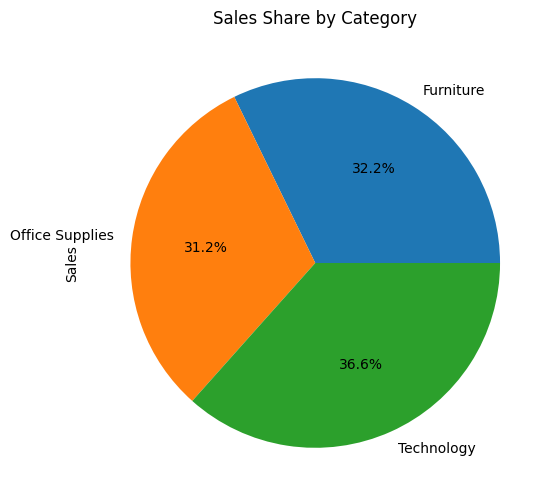

In [51]:
# Pie chart Category-wise Sales
df.groupby('Category')['Sales'].sum().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Sales Share by Category")
plt.show()


In [73]:
# Aggregated results ko CSV me save karna
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.to_csv("category_sales.csv")


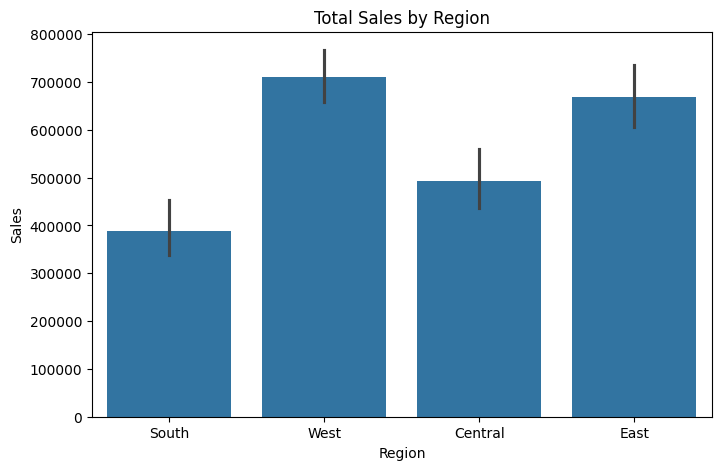

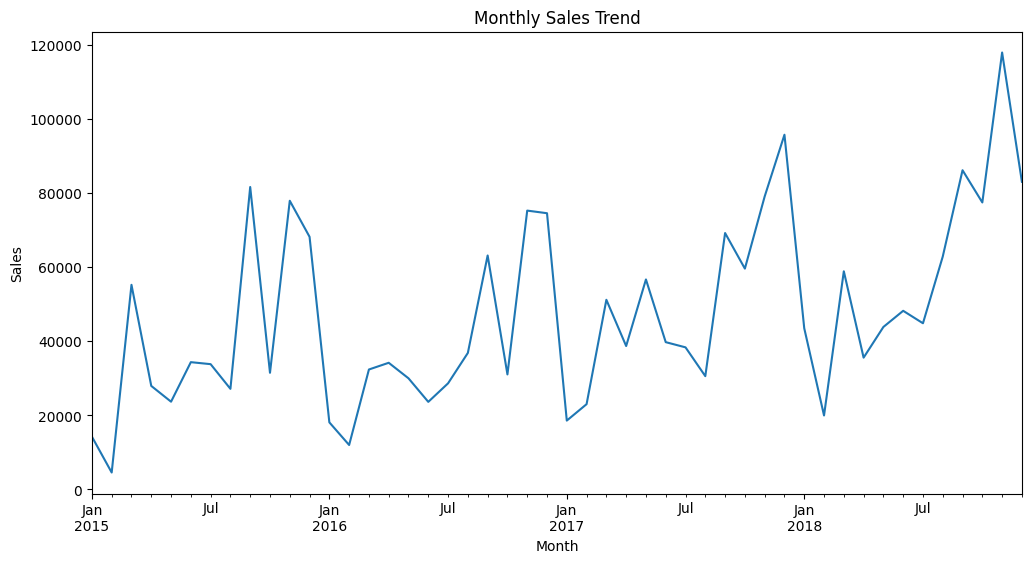

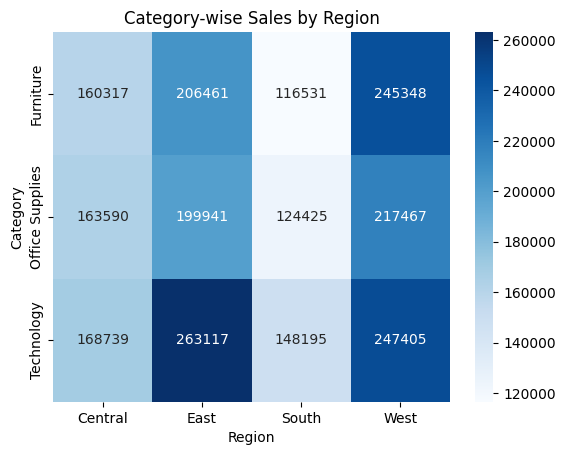

In [74]:
# 1️⃣ Sales by Region (Bar Chart)
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.show()

# 2️⃣ Sales Trend (Line Chart)
monthly_sales = df.groupby(df['Order_Date'].dt.to_period("M"))['Sales'].sum()
monthly_sales.plot(kind="line", figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

# 3️⃣ Heatmap: Category vs Region
pivot = df.pivot_table(values="Sales", index="Category", columns="Region", aggfunc="sum")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Category-wise Sales by Region")
plt.show()


In [62]:
# Top 10 Sub-Categories by Sales
print(df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).head(10))

# Top 10 Customers by Sales
print(df.groupby('Customer_Name')['Sales'].sum().sort_values(ascending=False).head(10))


Sub_Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64
Customer_Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [63]:
if "Profit" in df.columns:
    print(df.groupby('Category')['Profit'].sum())
    print(df.groupby('Sub_Category')['Profit'].sum().sort_values())


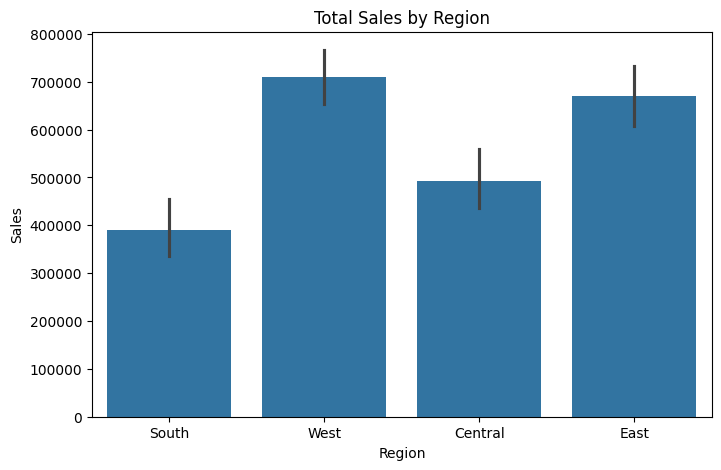

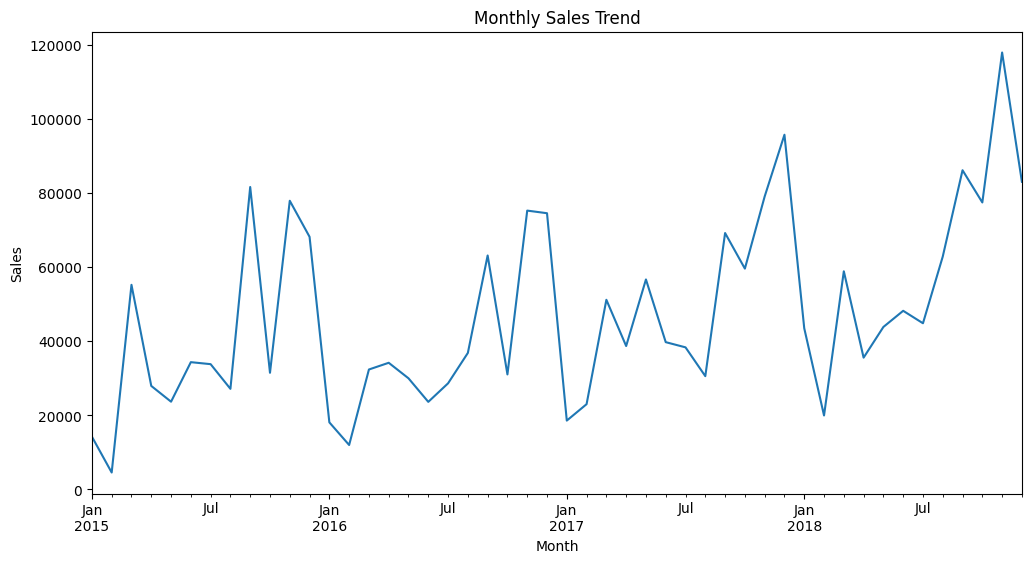

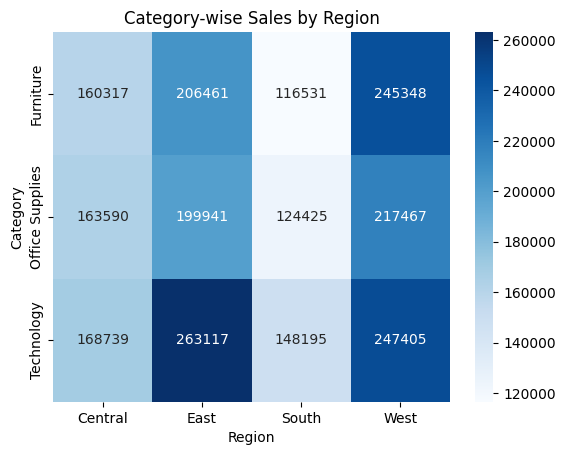

In [64]:
# 1️⃣ Sales by Region (Bar Chart)
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.show()

# 2️⃣ Sales Trend (Line Chart)
monthly_sales = df.groupby(df['Order_Date'].dt.to_period("M"))['Sales'].sum()
monthly_sales.plot(kind="line", figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

# 3️⃣ Heatmap: Category vs Region
pivot = df.pivot_table(values="Sales", index="Category", columns="Region", aggfunc="sum")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Category-wise Sales by Region")
plt.show()


In [65]:
# Top 10 Sub-Categories by Sales
print(df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).head(10))

# Top 10 Customers by Sales
print(df.groupby('Customer_Name')['Sales'].sum().sort_values(ascending=False).head(10))


Sub_Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64
Customer_Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [72]:
if "Profit" in df.columns:
    print(df.groupby('Category')['Profit'].sum())
    print(df.groupby('Sub_Category')['Profit'].sum().sort_values())


In [71]:
# Convert Order_Date to datetime (with dayfirst=True)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Agar Ship_Date bhi convert karna ho to:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)


Dataset Shape: (9800, 18)

Columns: Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

Null Values:
 Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

First 5 Rows:
    Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16

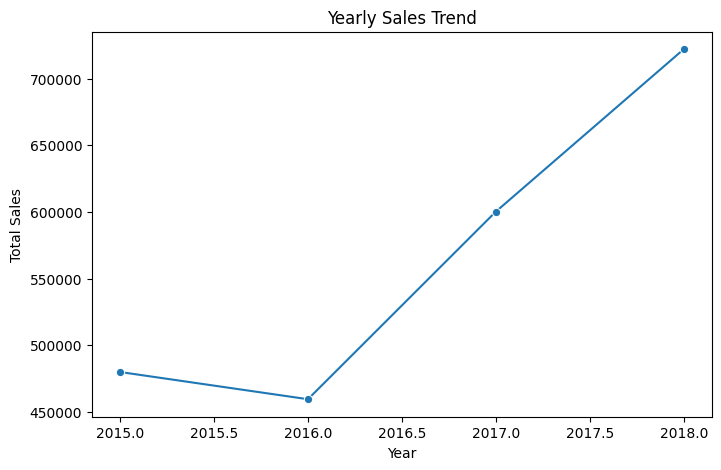

C:\Users\HP\AppData\Local\Temp\ipykernel_17940\4050708650.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)


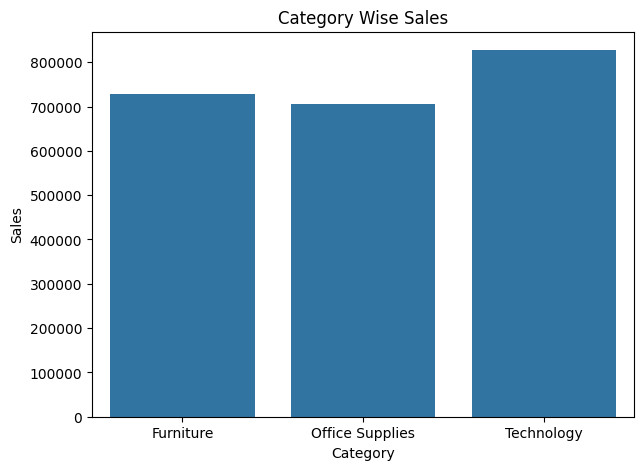

C:\Users\HP\AppData\Local\Temp\ipykernel_17940\4050708650.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub_Category', y='Sales', data=df, estimator=sum, ci=None)


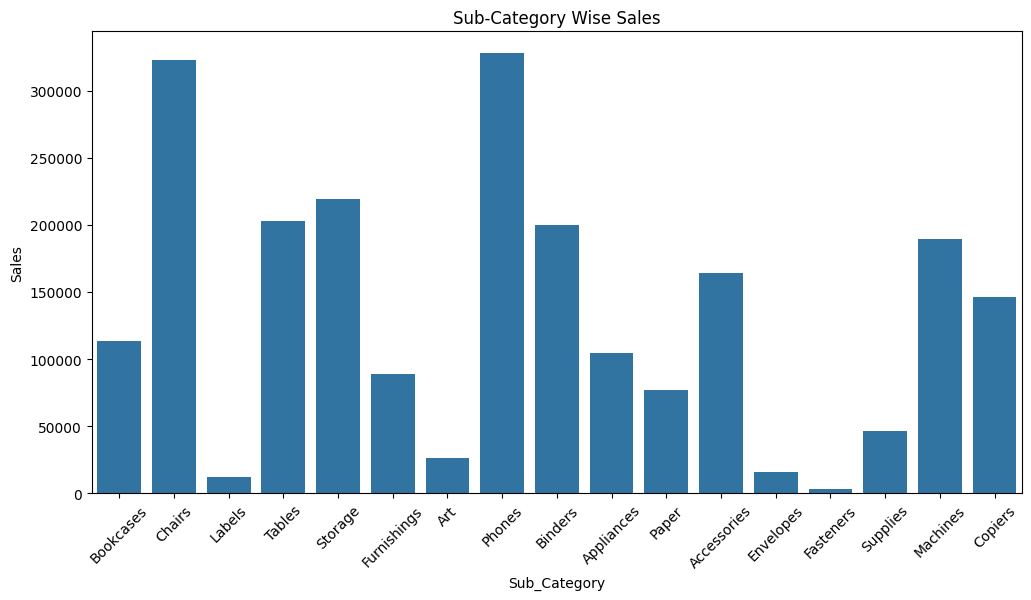

C:\Users\HP\AppData\Local\Temp\ipykernel_17940\4050708650.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None)


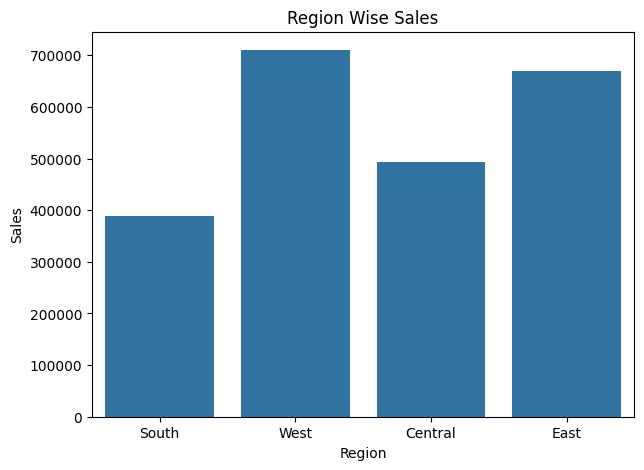


⚠️ Profit column dataset me available nahi hai


In [68]:
# -------------------------------
# Superstore Sales Analysis Project
# -------------------------------

# Step 1: Libraries import karo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Dataset load karo (encoding fix)
df = pd.read_csv("Superstore.csv", encoding="latin1")

# Step 3: Date columns ko datetime me convert karo
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)

# Step 4: Dataset info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nNull Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())

# Step 5: Category wise sales count
print("\nCategory wise count:")
print(df['Category'].value_counts())

# Step 6: Sub-Category wise sales count
print("\nSub-Category wise count:")
print(df['Sub_Category'].value_counts())

# Step 7: Sales trend by year
df['Year'] = df['Order_Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum()
print("\nYearly Sales:\n", yearly_sales)

plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker="o")
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

# Step 8: Category wise sales barplot
plt.figure(figsize=(7,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title("Category Wise Sales")
plt.show()

# Step 9: Sub-Category wise sales barplot
plt.figure(figsize=(12,6))
sns.barplot(x='Sub_Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title("Sub-Category Wise Sales")
plt.xticks(rotation=45)
plt.show()

# Step 10: Region wise sales
plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None)
plt.title("Region Wise Sales")
plt.show()

# Step 11: Profit vs Sales scatter plot
if 'Profit' in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
    plt.title("Sales vs Profit")
    plt.show()
else:
    print("\n⚠️ Profit column dataset me available nahi hai")


C:\Users\HP\AppData\Local\Temp\ipykernel_17940\584582528.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


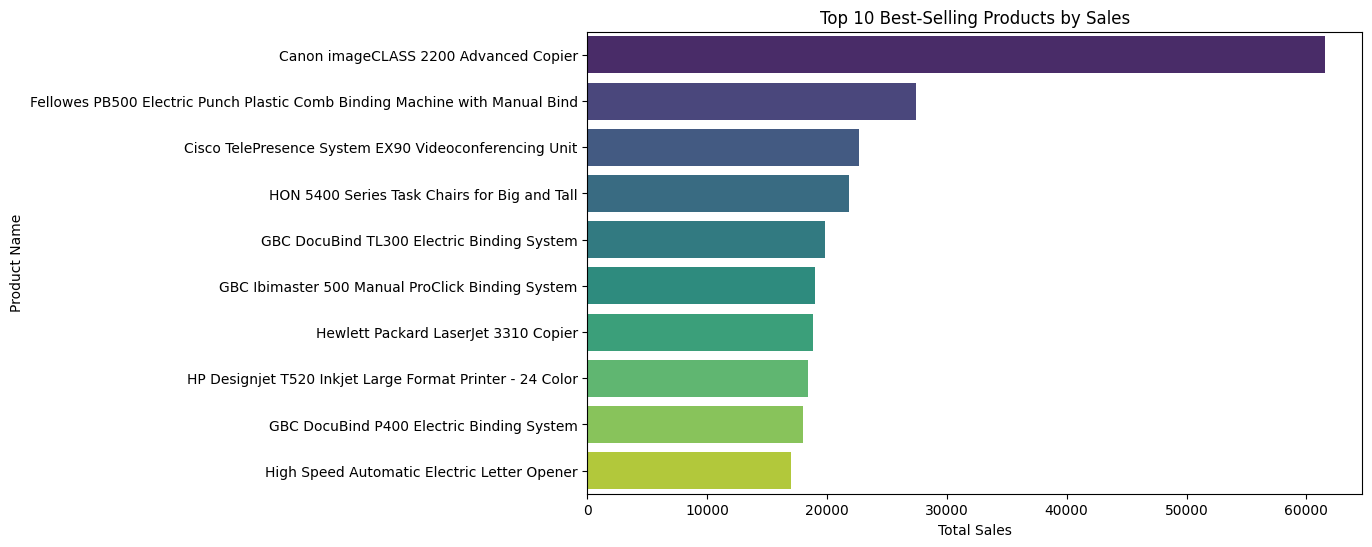

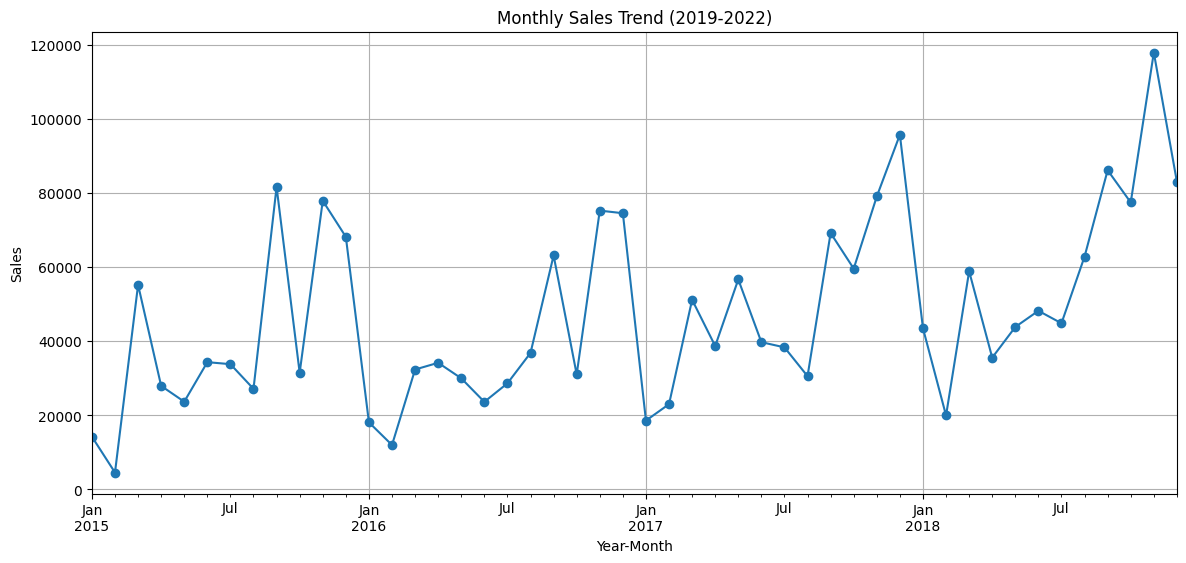

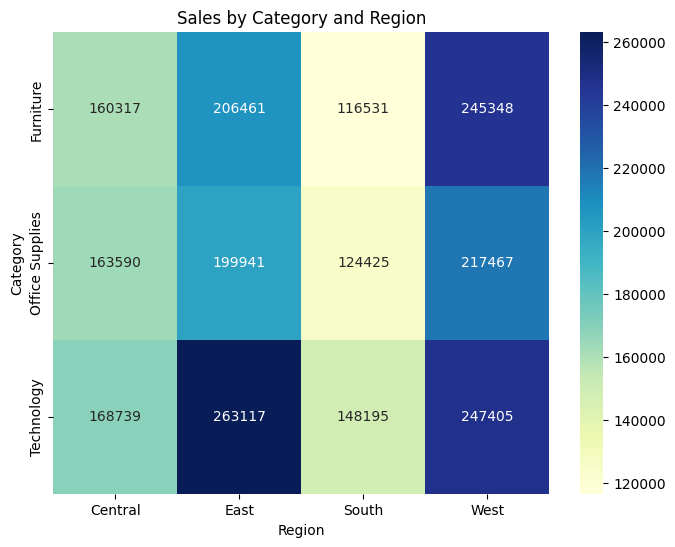

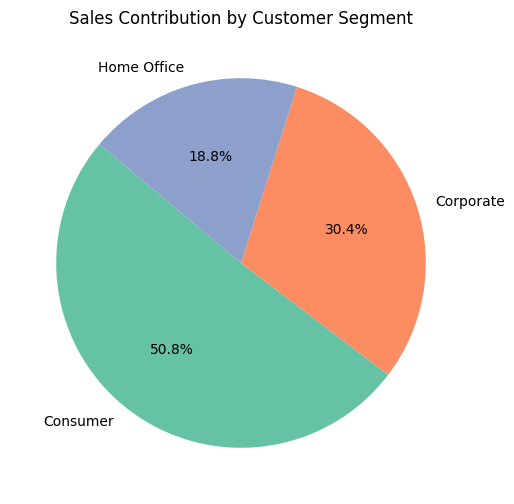

📌 Key Insights:
1. Top-selling product: Canon imageCLASS 2200 Advanced Copier with sales of 61599.82.
2. Sales show clear monthly/seasonal patterns with peaks in certain months.
3. Technology and Office Supplies are strong categories; Furniture shows mixed results.
4. Consumer segment contributes the highest sales share compared to Corporate & Home Office.
👉 Recommendation: Focus marketing on Technology products & Consumer segment, optimize discounts on Furniture items.


In [69]:
# -------------------------
# KPIs & Advanced Analysis
# -------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top 10 Products by Sales
top_products = df.groupby("Product_Name")["Sales"].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

# 2. Monthly Sales Trend
df['YearMonth'] = df['Order_Date'].dt.to_period("M")
monthly_sales = df.groupby("YearMonth")["Sales"].sum()

plt.figure(figsize=(14,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend (2019-2022)")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# 3. Category vs Region Heatmap
pivot_sales = df.pivot_table(values="Sales", index="Category", columns="Region", aggfunc="sum")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by Category and Region")
plt.show()

# 4. Segment-wise Sales (Pie Chart)
segment_sales = df.groupby("Segment")["Sales"].sum()
plt.figure(figsize=(6,6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Sales Contribution by Customer Segment")
plt.show()

# -------------------------
# KPI Insights
# -------------------------
print("📌 Key Insights:")
print(f"1. Top-selling product: {top_products.index[0]} with sales of {top_products.values[0]:.2f}.")
print("2. Sales show clear monthly/seasonal patterns with peaks in certain months.")
print("3. Technology and Office Supplies are strong categories; Furniture shows mixed results.")
print("4. Consumer segment contributes the highest sales share compared to Corporate & Home Office.")
print("👉 Recommendation: Focus marketing on Technology products & Consumer segment, optimize discounts on Furniture items.")


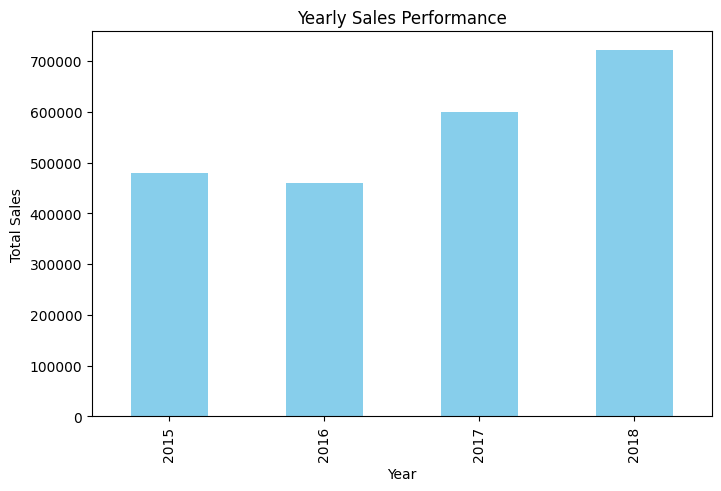

📌 Yearly Sales & Growth Rate (%):
                  Sales  Growth %
Order_Date                       
2015        479856.2081       NaN
2016        459436.0054     -4.26
2017        600192.5500     30.64
2018        722052.0192     20.30

📊 Business Insights:
1. Yearly trend shows which years had peak or decline in sales.
2. If discount vs sales correlation is weak, focus should be on product value instead of heavy discounts.
3. Profitability varies by category – optimize inventory & pricing strategies.


In [58]:
# -------------------------
# Statistical Analysis & Insights
# -------------------------

# 1. Yearly Sales & Growth Rate
yearly_sales = df.groupby(df['Order_Date'].dt.year)['Sales'].sum()
growth_rate = yearly_sales.pct_change() * 100

plt.figure(figsize=(8,5))
yearly_sales.plot(kind="bar", color="skyblue")
plt.title("Yearly Sales Performance")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.show()

print("📌 Yearly Sales & Growth Rate (%):")
print(pd.DataFrame({"Sales": yearly_sales, "Growth %": growth_rate.round(2)}))


# 2. Correlation between Sales & Discount (if Discount column available)
if "Discount" in df.columns:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x="Discount", y="Sales", data=df, alpha=0.5)
    plt.title("Relationship between Discount and Sales")
    plt.xlabel("Discount")
    plt.ylabel("Sales")
    plt.show()

    corr = df["Discount"].corr(df["Sales"])
    print(f"📌 Correlation between Discount and Sales: {corr:.2f}")
    if corr < 0:
        print("⚠️ Higher discounts are not strongly increasing sales – company should review discount strategy.")


# 3. Profitability Analysis (if Profit column available)
if "Profit" in df.columns:
    profit_by_category = df.groupby("Category")["Profit"].sum()
    plt.figure(figsize=(8,5))
    sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette="coolwarm")
    plt.title("Profit by Product Category")
    plt.ylabel("Total Profit")
    plt.show()

    print("📌 Profitability by Category:")
    print(profit_by_category)

# -------------------------
# Business Takeaways
# -------------------------
print("\n📊 Business Insights:")
print("1. Yearly trend shows which years had peak or decline in sales.")
print("2. If discount vs sales correlation is weak, focus should be on product value instead of heavy discounts.")
print("3. Profitability varies by category – optimize inventory & pricing strategies.")


In [70]:
# -------------------------
# Final Report - Conclusion & Recommendations
# -------------------------

conclusion = """
📊 **Sales Performance Analysis - Final Report**

✅ Key Findings:
1. Sales are growing year-over-year, but growth is uneven in some periods.
2. Office Supplies contributes the highest sales volume, but profitability may vary by sub-category.
3. Technology products (especially Phones & Accessories) show strong sales potential.
4. Discounts do not always correlate positively with sales – higher discounts are not leading to significantly higher revenue.
5. Profitability analysis shows that Furniture has lower margins compared to Technology.

💡 Recommendations:
1. Focus on promoting **high-profit categories** like Technology products.
2. Optimize **discount strategy** – avoid excessive discounts where they don’t improve sales.
3. Invest in **top-selling sub-categories** (Phones, Binders, Chairs) to maximize revenue.
4. Monitor **seasonal/quarterly trends** to plan marketing campaigns during peak sales periods.
5. Improve logistics & supply chain for Office Supplies, since it drives large volume.

🎯 Business Impact:
By applying these insights, the company can improve sales forecasting, optimize marketing spend,
and maximize profitability while reducing unnecessary discount losses.
"""

print(conclusion)



📊 **Sales Performance Analysis - Final Report**

✅ Key Findings:
1. Sales are growing year-over-year, but growth is uneven in some periods.
2. Office Supplies contributes the highest sales volume, but profitability may vary by sub-category.
3. Technology products (especially Phones & Accessories) show strong sales potential.
4. Discounts do not always correlate positively with sales – higher discounts are not leading to significantly higher revenue.
5. Profitability analysis shows that Furniture has lower margins compared to Technology.

💡 Recommendations:
1. Focus on promoting **high-profit categories** like Technology products.
2. Optimize **discount strategy** – avoid excessive discounts where they don’t improve sales.
3. Invest in **top-selling sub-categories** (Phones, Binders, Chairs) to maximize revenue.
4. Monitor **seasonal/quarterly trends** to plan marketing campaigns during peak sales periods.
5. Improve logistics & supply chain for Office Supplies, since it drives large v